In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import mean_squared_error, zero_one_loss, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import metrics
import xgboost as xgb
import seaborn as sns

In [3]:
train = pd.read_csv("santander-customer-satisfaction/train.csv",sep=",")
train
# ouverture du jeu de donnée train.csv

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [4]:
train.var15.describe() # affichage description de la variable var15

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

Avec une valeur minimun de 5 et une valeur maximun de 105, la variable "var15" de notre jeu de donnée pourrait correspondre à l'âge des clients.

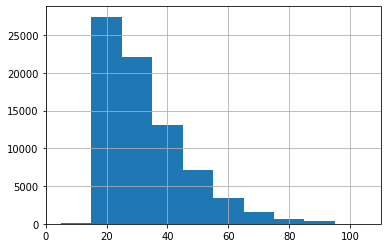

In [5]:
train.var15.hist() # nombre de personnes en fonction de l'âge

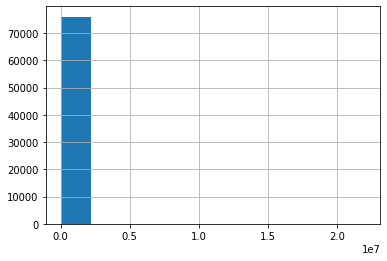

In [6]:
train.var38.hist() # valeur des prêts

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


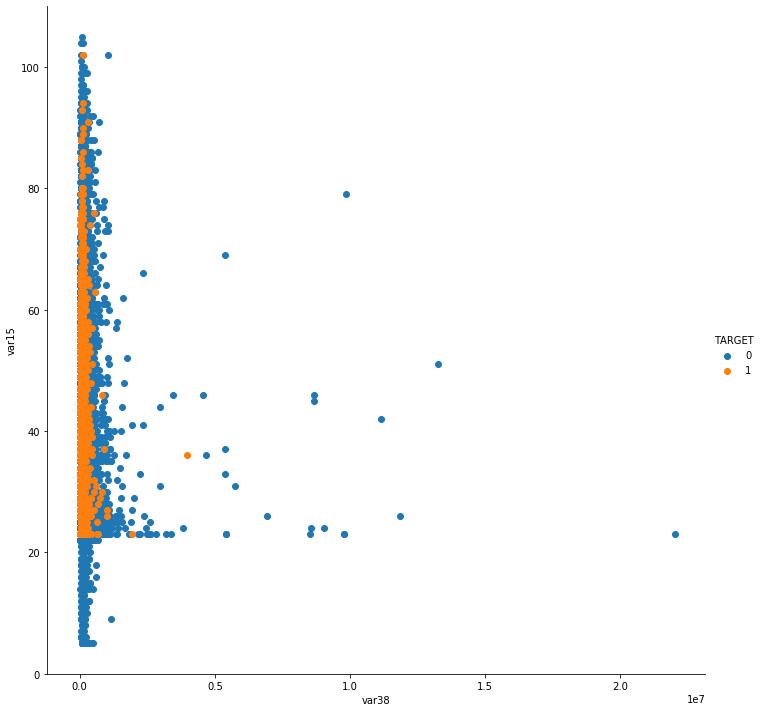

In [7]:
sns.FacetGrid(train, hue="TARGET", size=10) \
   .map(plt.scatter, "var38", "var15") \
   .add_legend();                             # Affichage var15 en fonction de var38


In [8]:
X = train.drop(['ID','TARGET'], axis=1)
y = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
# division du jeu de donné train afin d'avoir un train et un test pour lesquelles nous avons les vrais cibles.

In [9]:
reglog = LogisticRegression().fit(X_train,y_train) # entraînement du modèle de regression 
                                                #logistique sur l'ensemble d'entraînement.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
yhat_train_reglog = reglog.predict(X_train)
mse_train_reglog = zero_one_loss(yhat_train_reglog, y_train)
print(mse_train_reglog) 
# Calcul des prédictions et de l'erreur de prédiction


0.03980860299921074


In [11]:
yhat_test_reglog = reglog.predict(X_test)
mse_test_reglog = zero_one_loss(yhat_test_reglog, y_test)
print(mse_test_reglog)
print(1-metrics.accuracy_score(y_test,yhat_test_reglog ))
# Calcul des prédictions et de l'erreur de prédiction.
# Les fonctions zero_one_loss et accuracy_score donnent les mêmes résultats d'erreur de prédiction.


0.03860826098395154
0.03860826098395154


Test sur le jeu de donnée test.csv

In [12]:
test = pd.read_csv("santander-customer-satisfaction/test.csv",sep=",")
test_shape = test.drop(['ID'], axis=1) #avoir le meme nombre de 
#colonne que sur le jeu de donnée d'entraînement.


In [13]:
yhat_test = reglog.predict(test_shape)
# Prédiction par rapport au fichier de donnée test

In [14]:
results = pd.DataFrame({"ID":test.ID, "TARGET":yhat_test[:,]})
results.head(11) # affichage des prédiction des 10 premières lignes

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
5,11,0
6,12,0
7,15,0
8,16,0
9,17,0


In [15]:
results.TARGET.value_counts()
# Compte le nombre de valeurs selon que le client soit satisfait(0) ou non(1)

0    75818
Name: TARGET, dtype: int64

Utilisation du modèle XGBoost

In [16]:
training = train.replace(-999999, 2)   # On replace tout les valeurs absurde par 2 car 2 est la valeur 
                                    #la plus présente dans le jeu de donnée.

In [17]:
X_xgb = training.drop(['ID','TARGET'], axis=1)
y_xgb = training['TARGET']
X_xgb['n0'] = (X == 0).sum(axis=1)


In [18]:
features = \
['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var41_comer_ult1', 
'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 
'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var8_0', 'ind_var30', 'num_var4',
'num_op_var41_hace2', 'num_op_var41_ult1', 'num_op_var41_ult3', 'num_op_var39_hace2', 'num_op_var39_ult1', 
'num_op_var39_ult3', 'num_var30_0', 'num_var30', 'num_var35', 'num_var37_med_ult2', 'num_var37_0', 'num_var37', 
'num_var39_0', 'num_var42', 'saldo_var5', 'saldo_var30', 'saldo_var37', 'saldo_var42', 'var36', 'imp_var43_emit_ult1', 
'imp_trans_var37_ult1', 'ind_var43_emit_ult1', 'ind_var43_recib_ult1', 'num_ent_var16_ult1', 'num_var22_hace2', 
'num_var22_hace3', 'num_var22_ult1', 'num_var22_ult3', 'num_med_var22_ult3', 'num_med_var45_ult3', 'num_meses_var5_ult3', 
'num_meses_var39_vig_ult3', 'num_op_var39_comer_ult1', 'num_op_var39_comer_ult3', 'num_op_var41_comer_ult1',
'num_op_var41_comer_ult3', 'num_op_var41_efect_ult1', 'num_op_var41_efect_ult3', 'num_op_var39_efect_ult3', 
'num_var43_emit_ult1', 'num_var43_recib_ult1', 'num_var45_hace2', 'num_var45_hace3', 'num_var45_ult1', 'num_var45_ult3',
'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'var38', 'n0']

features prend toutes les varaibles qui vont être prise en compte dans notre modèle xgboost

In [19]:
X_sel = X_xgb[features]

test['n0'] = (test == 0).sum(axis=1)
sel_test = test[features]   

xgtrain = xgb.DMatrix(X_sel, label=y_xgb)
clf = xgb.XGBClassifier(missing=9999999999,
                max_depth = 7,
                n_estimators=700,
                learning_rate=0.1, 
                nthread=4,
                subsample=1.0,
                colsample_bytree=0.5,
                min_child_weight = 3,
                seed=1301)
xgb_param = clf.get_xgb_params()
#do cross validation
print ('Start cross validation')
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=5000, nfold=15, metrics=['auc'],
     early_stopping_rounds=50, stratified=True, seed=1301)
print('Best number of trees = {}'.format(cvresult.shape[0]))
clf.set_params(n_estimators=cvresult.shape[0])
print('Fit on the trainingsdata')
clf.fit(X_sel, y_xgb, eval_metric='auc')
print('Overall AUC:', roc_auc_score(y, clf.predict_proba(X_sel)[:,1]))
print('Predict the probabilities based on features in the test set')
pred = clf.predict_proba(sel_test, ntree_limit=cvresult.shape[0])




/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Start cross validation
Best number of trees = 78
Fit on the trainingsdata
Overall AUC: 0.8983459578307442
Predict the probabilities based on features in the test set


In [20]:
submission = pd.DataFrame({"ID":test.index, "TARGET":pred[:,1]}) # resultats de la prédiction dans un tableau

Le modèle xgboost prédit les probabilités que la cible soit 0 ou 1.

In [21]:
submission.head(11)

,ID,TARGET
0,0,0.035093
1,1,0.048720
2,2,0.002344
3,3,0.009833
4,4,0.002622
5,5,0.229422
6,6,0.031167
7,7,0.175451
8,8,0.029654
9,9,0.023106


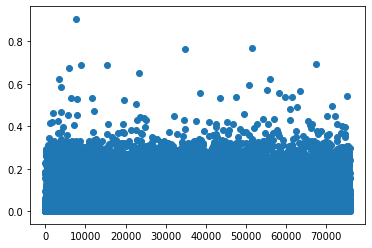

In [22]:
plt.scatter(submission['ID'],submission['TARGET']) # Prédiction en fonction de l'ID client.

In [23]:
submission.loc[submission['TARGET'] > 0.3, 'TARGET'] = 1
submission.loc[submission['TARGET'] < 0.3, 'TARGET'] = 0


En trouvant un certain seuil, nous pouvons montrer que si la probabilité est supérieur à ce seuil alors la cible vaut 1, sinon la cible vaut 0. 

In [24]:
submission.TARGET.value_counts()

0.0    75497
1.0      321
Name: TARGET, dtype: int64

In [26]:
submission

,ID,TARGET
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
75813,75813,0.0
75814,75814,0.0
75815,75815,0.0
75816,75816,0.0
